In [1]:
from src.xG_visualization import Visualization
from src.xG_preprocessing import Preprocessing

from pyspark.sql import SparkSession

In [16]:
spark = SparkSession.builder.appName("Viz").getOrCreate()

In [3]:
# Reading data
df = spark.read.csv('data/split_data/events/Europe - Champions League.csv',  # Load the CSV file containing events data
                    sep=';', # Specify the separator
                    inferSchema=True, # Automatically infer column data types (e.g., int, string, double)
                    header=True) # Use the first row as column headers

In [4]:
data = Preprocessing(spark, df, season=None)

25/07/19 12:30:59 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
data.df.show(5)

+--------------------+--------------------+---------+--------+-----------------+------+------+------+---------------+---------------+----------------+----------+-------------------+-------+-------+-------+-----------+------------+-------+-----------+-------+------+-------+-------+---------------------+----------------+-------------+------------------+------------------+------------------+--------------+---------------+---------------+---------------+--------------+--------------------+-------------------+--------+-----------+-----------+----------+---------------+----------+-------------+-----------+-----------------+---------------+----------------+-------------+-------------+------------+------------------+----------+----------+-------------+-----------------+----+
|                  id|              player|player_id|match_id|             team|period|minute|second|shot_location_x|shot_location_y|distance_to_goal|shot_angle|preferred_foot_shot|from_rp|from_fk|from_ti|from_corner|from_

In [6]:
viz = Visualization(data)

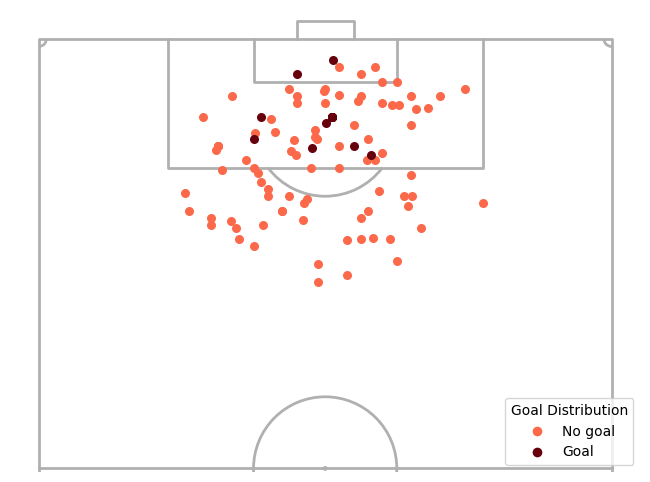

In [7]:
viz.shot_distribution(val='goal',t='goal',sample=100,size=30)

In [8]:
viz.gxg_scatter(min_goal=0,min_xg=0)

In [9]:
data.df.show(2,False)

+------------------------------------+------------------------------+---------+--------+-----------------+------+------+------+---------------+---------------+----------------+----------+-------------------+-------+-------+-------+-----------+------------+-------+-----------+-------+------+-------+-------+---------------------+----------------+-------------+------------------+------------------+------------------+--------------+---------------+---------------+---------------+--------------+--------------------+-------------------+--------+-----------+-----------+----------+---------------+----------+-------------+-----------+-----------------+---------------+----------------+-------------+-------------+------------+-----------------+----------+----------+-------------+-----------------+----+
|id                                  |player                        |player_id|match_id|team             |period|minute|second|shot_location_x|shot_location_y|distance_to_goal|shot_angle|preferred_

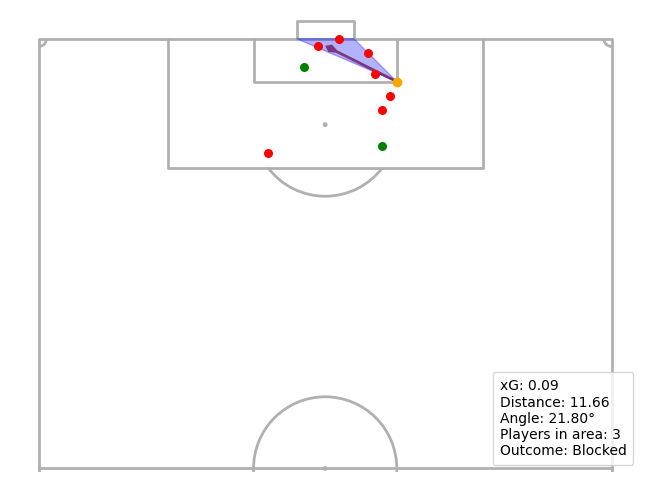

In [10]:
viz.shot_frame('56844d38-55b8-41fe-9743-da228290fc51',show_angle=True)

25/07/19 12:31:11 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


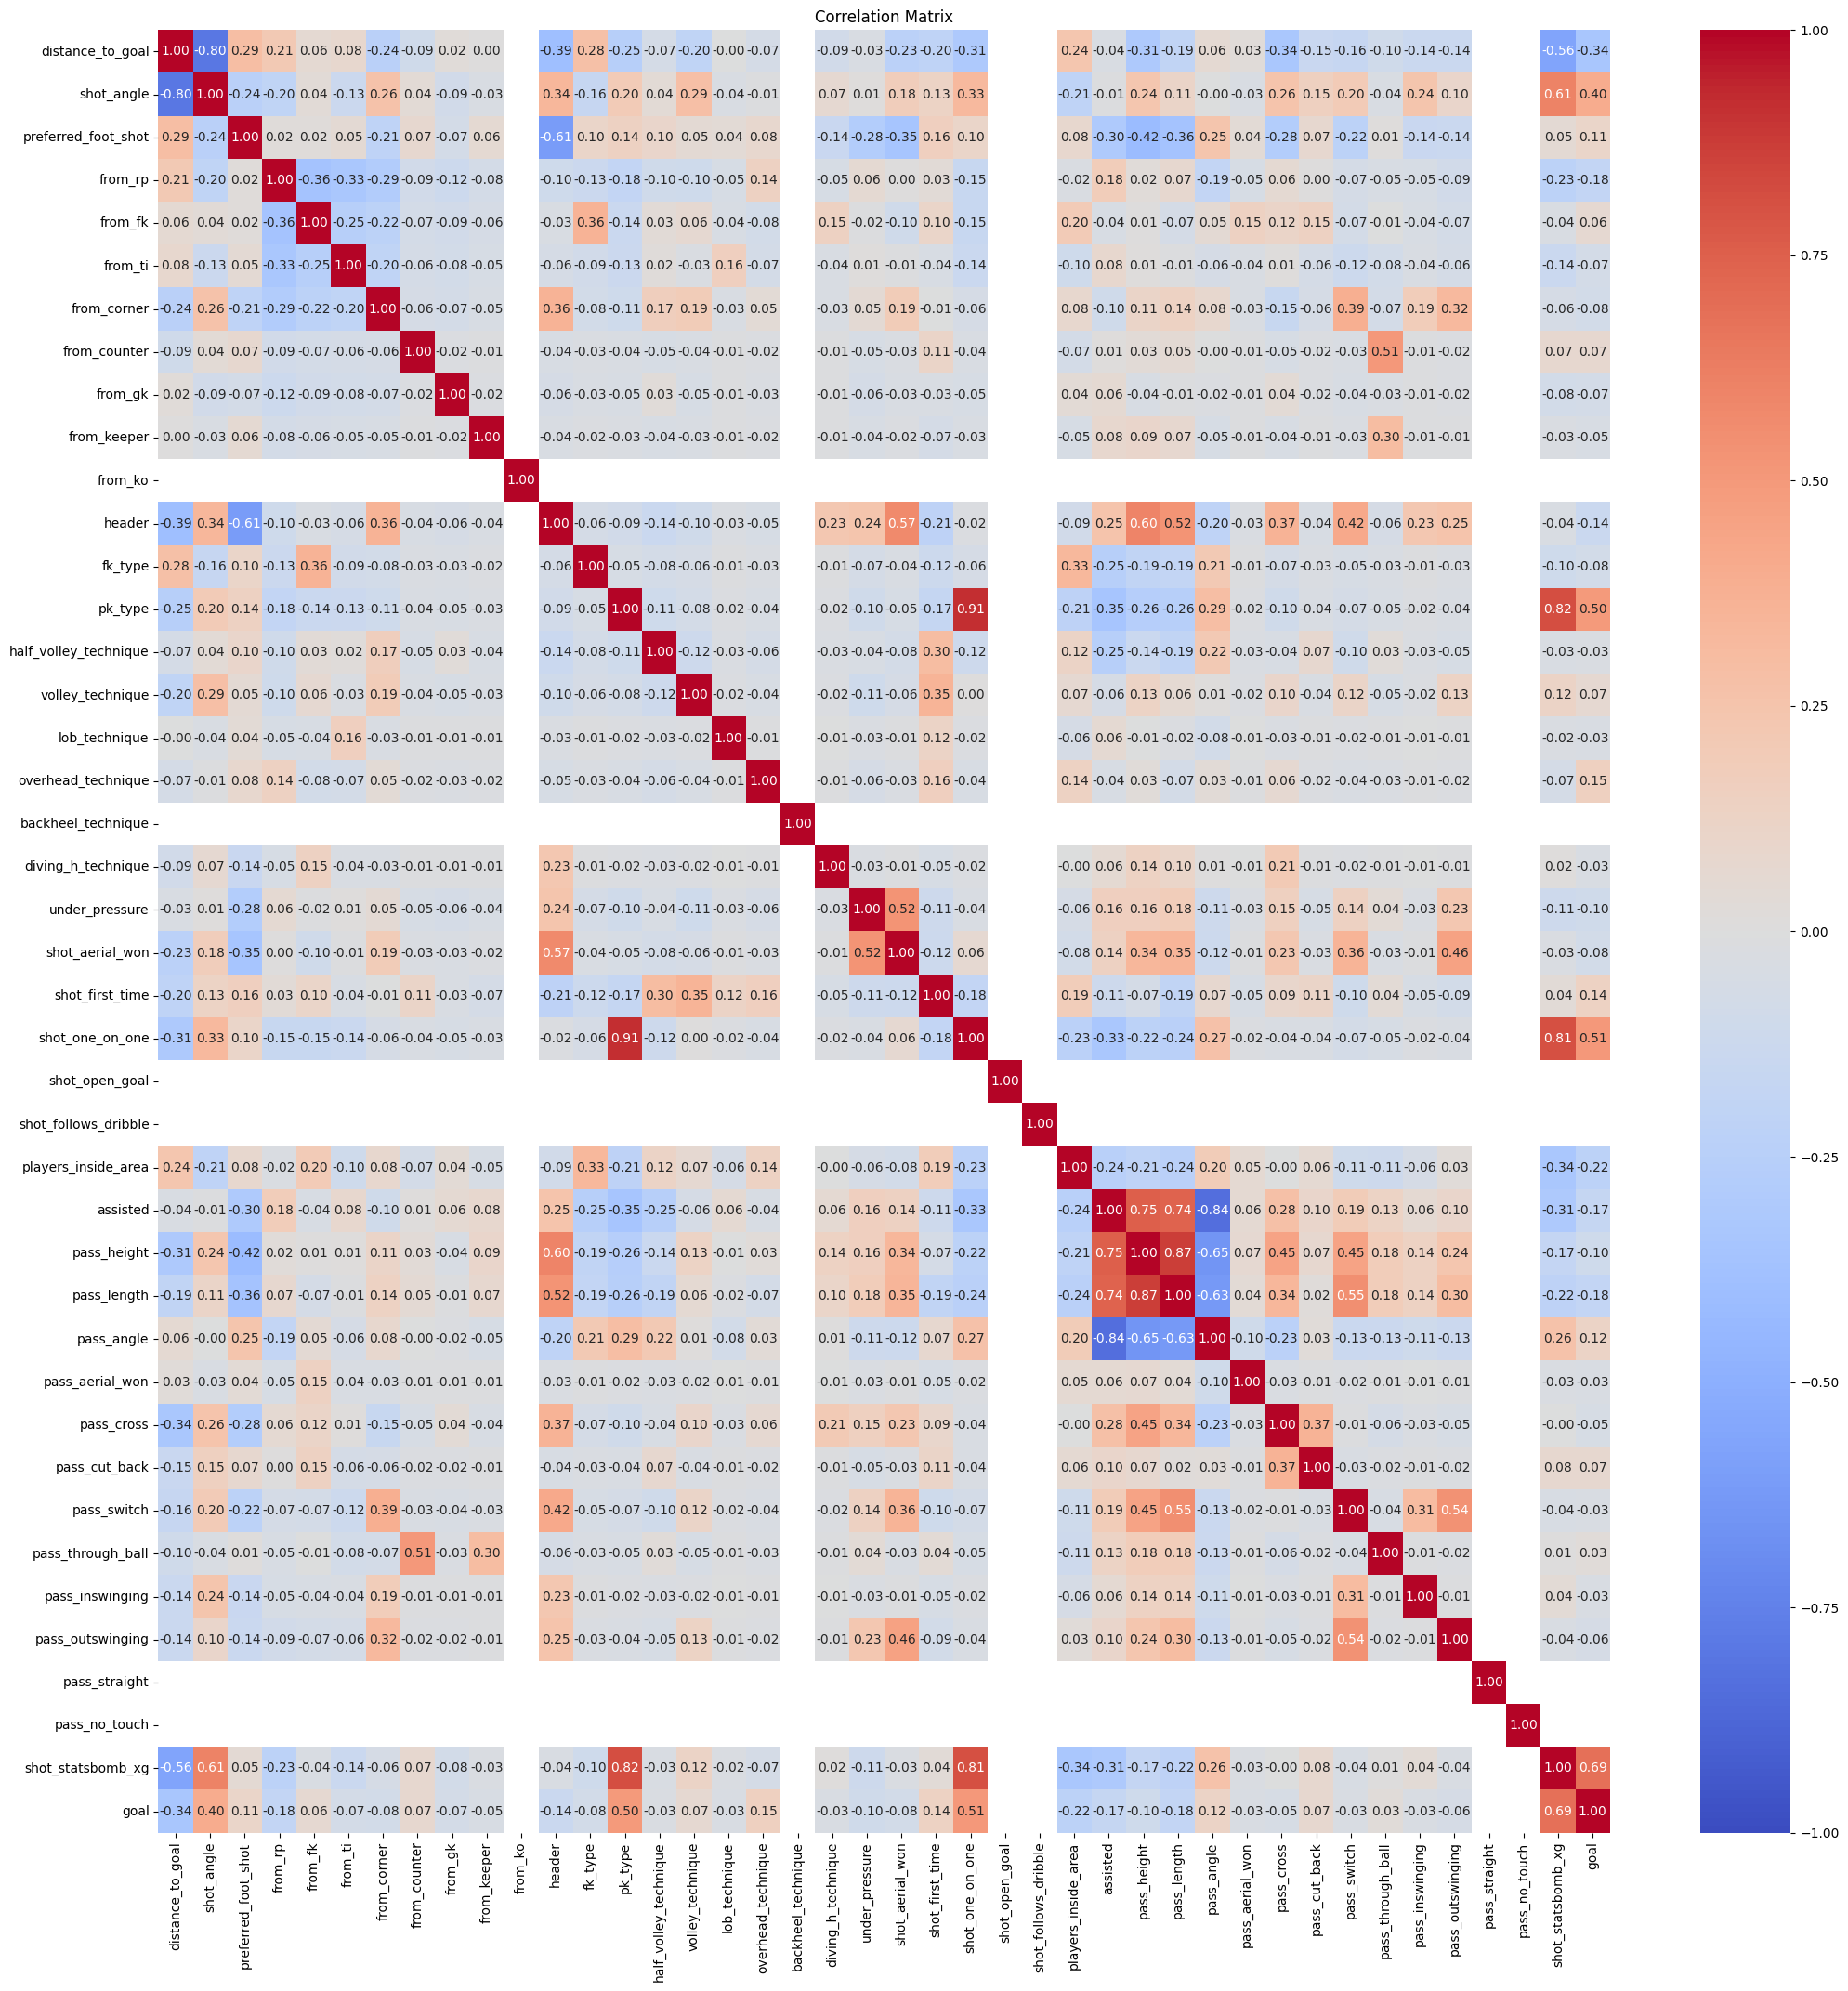

In [11]:
viz.correlation()

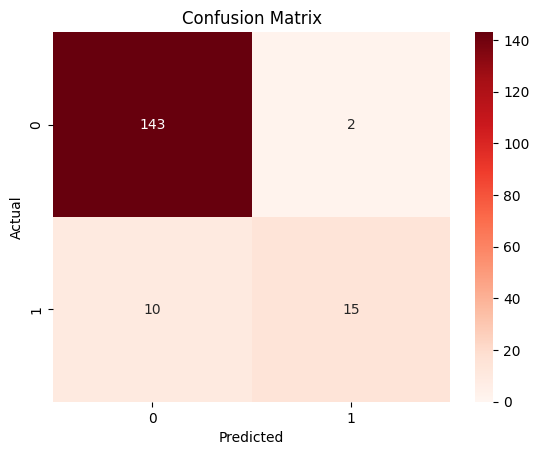

In [12]:
viz.confusion_matrix(predicted='sb_prediction')

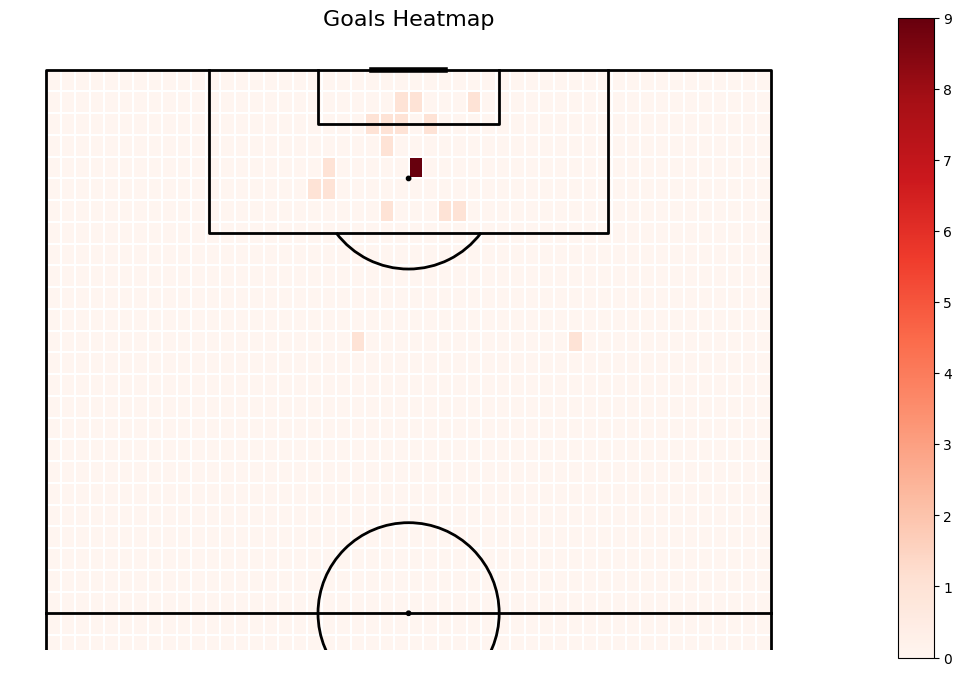

In [13]:
viz.shot_goal_heatmap()